## Problem Statement:
There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.
The goal here is to predict the Price of an Old car based on the variables provided in the data set.
Working with Data
Data has been split into two groups and provided in the module:

training set 
test set 
The training set is used to build your machine learning model. For the training set, we provide the price of a car (also known as the variable Price) for each participant.
The test set should be used to see how well your model performs on unseen data. For the test set, it is your job to predict price of the car (Price) for each participant.





In [1]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Train Data
train=pd.read_csv('Training+Data+Set_N(1).csv')
print(train.shape)
train.head()

(53515, 17)


,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [3]:
# Loading Test Data
test=pd.read_csv('Test+Data+Set(1).csv')
print(test.shape)
test.head()

(5615, 16)


,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [4]:
test.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [5]:
train.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [6]:
train.describe().round(2)

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.00,52304.00,53515.00,53515.00,53515.00,52076.00,53515.00,53515.00
mean,51758.00,94546.26,2010.41,8.59,1904.05,100.45,6.00,1098083.51
std,15448.59,275561.72,4.65,4.65,1496.56,45.33,1.42,844156.53
min,25001.00,0.00,1934.00,3.00,14.00,10.00,4.00,3.00
25%,38379.50,15490.00,2008.00,5.00,1395.00,73.00,5.00,505181.25
50%,51758.00,65520.00,2011.00,8.00,1896.00,91.00,6.00,885455.25
75%,65136.50,135641.00,2014.00,11.00,1995.00,125.00,7.00,1477828.88
max,78515.00,9899800.00,2016.00,85.00,32000.00,896.00,8.00,22120775.25


## Data Cleaning

In [7]:
# Checking for any Invalid characters:

cat_cols=(train.select_dtypes(include='object').columns)
for i in cat_cols:
    print(i,' : ',train[i].unique())

Maker  :  ['skoda' 'fiat' 'bmw' 'nissan' 'audi' 'toyota' 'hyundai' 'maserati']
model  :  ['octavia' 'panda' 'x1' 'juke' 'x5' 'superb' 'qashqai' 'coupe' 'micra'
 'aygo' 'yeti' 'auris' 'q3' 'q5' 'x3' 'avensis' 'i30' 'q7' 'tt' 'citigo'
 'yaris' 'roomster' 'rapid']
Location  :  ['Ahmedabad' 'Hyderabad' 'Mumbai' 'Jaipur' 'Chennai' 'Coimbatore' 'Kochi'
 'Bangalore' 'Pune' 'Kolkata' 'Delhi']
Owner Type  :  ['Second' 'Third' 'Fourth & Above' 'First']
body_type  :  ['compact' nan 'van']
transmission  :  ['man' 'auto']
door_count  :  ['None' '4' '5' '2' '3' '1' '6']
seat_count  :  ['None' '4' '5' '2' '3' '7' '6' '1' '9' '8']
fuel_type  :  ['petrol' 'diesel']


In [8]:
# Replacing 'None' with Nan
print(train.door_count.isnull().sum())
print(train.seat_count.isnull().sum())
train['door_count']=train['door_count'].replace('None',np.nan)
train['seat_count']=train['seat_count'].replace('None',np.nan)
print(train.door_count.isnull().sum())
print(train.seat_count.isnull().sum())

0
0
7534
8511


## BASE MODEL 

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
base_model=np.repeat(train['Price'].mean(),len(train['Price']))
np.sqrt(mean_squared_error(train['Price'],base_model))

844148.6435902913

## Model 1 : Dropping Null Features

In [11]:
# Since Test Data also contains Null values in Distance, engine_power , and body_type .... Same as in Train data set..
#Thus it would require serious Imputations...
# For starting with , I'll simply drop these cols with null values and would deal with it later..

In [12]:
df= train.drop(['distance','engine_power','door_count','seat_count','body_type'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 12 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 4.9+ MB


In [13]:
dummytrain=pd.get_dummies(df)
dummytrain.head()

,Id,manufacture_year,Age of car,engine_displacement,Vroom Audit Rating,Price,Maker_audi,Maker_bmw,Maker_fiat,Maker_hyundai,...,Location_Mumbai,Location_Pune,Owner Type_First,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_auto,transmission_man,fuel_type_diesel,fuel_type_petrol
0,25001,1964,55,1964,8,543764.25,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,25002,2012,7,1242,6,401819.25,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
2,25003,2014,5,1995,7,2392855.50,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
3,25004,2011,8,1618,7,958606.50,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
4,25005,2012,7,2993,7,3085561.50,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [14]:
x=dummytrain.drop('Price',axis=1)
y=dummytrain['Price']

In [15]:
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [16]:
rf=RandomForestRegressor(n_estimators=10)
rmse_cv=np.sqrt(abs(cross_val_score(rf,x,y,scoring='neg_mean_squared_error',cv=5)))
print(rmse_cv)
rmse_cv.mean()

[320839.34479958 300261.90225641 274918.42626267 337892.73463314
 321824.66594229]


311147.414778818

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
rf=RandomForestRegressor(n_estimators=50)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
np.sqrt(mean_squared_error(ypred,ytest))

279965.5778465414

## Model 2 - Null Value Imputation

In [18]:
train.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count              7534
seat_count              8511
fuel_type                  0
Price                      0
dtype: int64

In [19]:
train.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,NaN,NaN,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


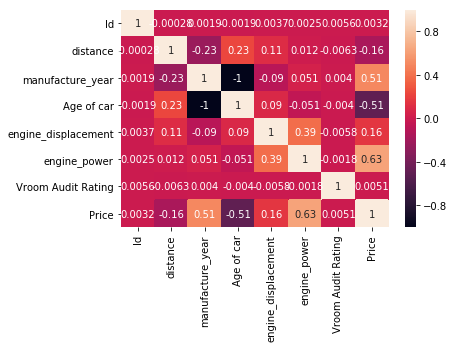

In [20]:
# drop manufacture_year
sns.heatmap(train.corr(),annot=True)

### 1. Imputing Null Values in Distance

In [21]:
# Distance is highly correlated with Age of car
train['Age of car'].unique()

array([55,  7,  5,  8,  4, 10,  9, 20,  6, 12, 15, 17, 13, 11, 14, 19, 18,
       16, 21, 39, 29, 24,  3, 23, 22, 25, 51, 26, 27, 28, 69, 48, 31, 30,
       35, 46, 36, 34, 53, 37, 85, 60, 63, 57, 67, 64, 50, 59, 33, 45, 32,
       47, 38, 43, 56], dtype=int64)

In [22]:
train.describe().round(2)

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.00,52304.00,53515.00,53515.00,53515.00,52076.00,53515.00,53515.00
mean,51758.00,94546.26,2010.41,8.59,1904.05,100.45,6.00,1098083.51
std,15448.59,275561.72,4.65,4.65,1496.56,45.33,1.42,844156.53
min,25001.00,0.00,1934.00,3.00,14.00,10.00,4.00,3.00
25%,38379.50,15490.00,2008.00,5.00,1395.00,73.00,5.00,505181.25
50%,51758.00,65520.00,2011.00,8.00,1896.00,91.00,6.00,885455.25
75%,65136.50,135641.00,2014.00,11.00,1995.00,125.00,7.00,1477828.88
max,78515.00,9899800.00,2016.00,85.00,32000.00,896.00,8.00,22120775.25


In [23]:
# train[train['distance'].isnull()]
# #train.loc[0,'distance']
np.isnan(train.loc[53,'distance'])

True

In [24]:
df.loc[0]

Id                         25001
Maker                      skoda
model                    octavia
Location               Ahmedabad
Owner Type                Second
manufacture_year            1964
Age of car                    55
engine_displacement         1964
Vroom Audit Rating             8
transmission                 man
fuel_type                 petrol
Price                     543764
Name: 0, dtype: object

In [25]:
print(train['distance'].isnull().sum())
age_df=train.groupby('Age of car')['distance'].mean()
for i in range(0,len(train)):
    if(np.isnan(train.loc[i,'distance'])):
        age=train.loc[i,'Age of car']
        train.loc[i,'distance']=age_df.loc[age]
print(train['distance'].isnull().sum())

1211
8


In [26]:
# Now only those Null Values in Distance are left whose age wise distance is not their in data
# So simply imputing them with Distnace

In [27]:
print('Null values in Distance: ',train['distance'].isnull().sum())
train.loc[train['distance'].isnull(),'distance']=train['distance'].median()
print('Null values in Distance: ',train['distance'].isnull().sum())

Null values in Distance:  8
Null values in Distance:  0


### 2. Imputing Null Values in engine_power

In [28]:
train.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,68150.0,Second,1964,55,1964,147.0,compact,8,man,NaN,NaN,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [29]:
train['engine_power'].describe()

count    52076.000000
mean       100.448345
std         45.330622
min         10.000000
25%         73.000000
50%         91.000000
75%        125.000000
max        896.000000
Name: engine_power, dtype: float64

In [30]:
train[train['model']=='octavia'].describe()

,Id,distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,12619.000000,1.261900e+04,12619.000000,12619.000000,12619.000000,12242.000000,12619.000000,1.261900e+04
mean,51710.767652,1.642193e+05,2008.335050,10.664950,1983.284492,90.019360,5.988826,6.936200e+05
std,15437.724904,4.143420e+05,5.152635,5.152635,1739.747702,22.105262,1.423247,4.981087e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,74.000000,10.000000,4.000000,3.000000e+00
25%,38355.500000,6.800000e+04,2005.000000,7.000000,1598.000000,77.000000,5.000000,3.371681e+05
50%,51805.000000,1.434430e+05,2009.000000,10.000000,1896.000000,77.000000,6.000000,5.551440e+05
75%,64900.500000,1.929976e+05,2012.000000,14.000000,1968.000000,103.000000,7.000000,9.132128e+05
max,78512.000000,9.370350e+06,2016.000000,85.000000,31900.000000,896.000000,8.000000,1.275566e+07


In [31]:
train.groupby('model')['engine_power'].mean()

model
auris        85.831810
avensis     102.923537
aygo         50.382597
citigo       47.818100
coupe       157.459268
i30          80.453158
juke         89.518960
micra        53.836155
octavia      90.019360
panda        49.334090
q3          120.276968
q5          145.496531
q7          194.640486
qashqai      95.280729
rapid        70.570307
roomster     63.686002
superb      112.183442
tt          162.674470
x1          117.453967
x3          135.803585
x5          191.267957
yaris        60.979695
yeti         88.797038
Name: engine_power, dtype: float64

In [32]:
print(train['engine_power'].isnull().sum())
ep_df=train.groupby('model')['engine_power'].mean()
for i in range(0,len(train)):
    if(np.isnan(train.loc[i,'engine_power'])):
        epavg=train.loc[i,'model']
        train.loc[i,'engine_power']=ep_df.loc[epavg]
print(train['engine_power'].isnull().sum())

1439
0


## Imputing Null Values for door_count

In [33]:
# Imputing with mode
print(train['door_count'].isnull().sum())
freq=train['door_count'].mode()[0]
train['door_count']=train['door_count'].fillna(freq)
print(train['door_count'].isnull().sum())

7534
0


## Imputing Null Values for seat_count

In [34]:
# Imputing with mode
print(train['seat_count'].isnull().sum())
freq=train['seat_count'].mode()[0]
train['seat_count']=train['seat_count'].fillna(freq)
print(train['seat_count'].isnull().sum())

8511
0


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               53515 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           53515 non-null float64
body_type              4136 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


In [36]:
train.columns

Index(['Id', 'Maker', 'model', 'Location', 'distance', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [37]:
mtrain=train.drop(['Id','manufacture_year','body_type'],axis=1)
mtrain.head()

,Maker,model,Location,distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,skoda,octavia,Ahmedabad,68150.0,Second,55,1964,147.0,8,man,4,5,petrol,543764.25
1,fiat,panda,Ahmedabad,27750.0,Third,7,1242,51.0,6,man,4,4,petrol,401819.25
2,bmw,x1,Hyderabad,46000.0,Third,5,1995,105.0,7,auto,4,5,diesel,2392855.50
3,nissan,juke,Mumbai,43949.0,Third,8,1618,140.0,7,man,4,5,petrol,958606.50
4,bmw,x5,Jaipur,59524.0,Fourth & Above,7,2993,180.0,7,auto,4,5,diesel,3085561.50


In [38]:
mtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 14 columns):
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               53515 non-null float64
Owner Type             53515 non-null object
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           53515 non-null float64
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 5.7+ MB


In [39]:
mtrain['door_count']=mtrain['door_count'].astype(int)
mtrain['seat_count']=mtrain['seat_count'].astype(int)

In [40]:
mtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 14 columns):
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
distance               53515 non-null float64
Owner Type             53515 non-null object
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           53515 non-null float64
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null int32
seat_count             53515 non-null int32
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int32(2), int64(3), object(6)
memory usage: 5.3+ MB


In [41]:
dtrain=pd.get_dummies(mtrain)
print(dtrain.shape)
dtrain.head()

(53515, 58)


,distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,Maker_audi,Maker_bmw,...,Location_Mumbai,Location_Pune,Owner Type_First,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_auto,transmission_man,fuel_type_diesel,fuel_type_petrol
0,68150.0,55,1964,147.0,8,4,5,543764.25,0,0,...,0,0,0,0,1,0,0,1,0,1
1,27750.0,7,1242,51.0,6,4,4,401819.25,0,0,...,0,0,0,0,0,1,0,1,0,1
2,46000.0,5,1995,105.0,7,4,5,2392855.50,0,1,...,0,0,0,0,0,1,1,0,1,0
3,43949.0,8,1618,140.0,7,4,5,958606.50,0,0,...,1,0,0,0,0,1,0,1,0,1
4,59524.0,7,2993,180.0,7,4,5,3085561.50,0,1,...,0,0,0,1,0,0,1,0,1,0


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss=StandardScaler()
x=dtrain.drop('Price',axis=1)
y=dtrain['Price']
x_scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.head()

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Maker_audi,Maker_bmw,Maker_fiat,...,Location_Mumbai,Location_Pune,Owner Type_First,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_auto,transmission_man,fuel_type_diesel,fuel_type_petrol
0,-0.102578,9.979640,0.040059,1.038634,1.411263,0.033775,0.184494,-0.398258,-0.393584,-0.188964,...,-0.316049,-0.316121,-0.578134,-0.576494,1.733238,-0.577818,-0.675888,0.675888,-1.030417,1.030417
1,-0.250700,-0.342321,-0.442383,-1.099380,0.001146,0.033775,-1.741610,-0.398258,-0.393584,5.292015,...,-0.316049,-0.316121,-0.578134,-0.576494,-0.576955,1.730649,-0.675888,0.675888,-1.030417,1.030417
2,-0.183788,-0.772403,0.060774,0.103253,0.706204,0.033775,0.184494,-0.398258,2.540752,-0.188964,...,-0.316049,-0.316121,-0.578134,-0.576494,-0.576955,1.730649,1.479535,-1.479535,0.970481,-0.970481
3,-0.191308,-0.127281,-0.191139,0.882737,0.706204,0.033775,0.184494,-0.398258,-0.393584,-0.188964,...,3.164067,-0.316121,-0.578134,-0.576494,-0.576955,1.730649,-0.675888,0.675888,-1.030417,1.030417
4,-0.134204,-0.342321,0.727641,1.773576,0.706204,0.033775,0.184494,-0.398258,2.540752,-0.188964,...,-0.316049,-0.316121,-0.578134,1.734622,-0.576955,-0.577818,1.479535,-1.479535,0.970481,-0.970481


In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=0)
rf=RandomForestRegressor(n_estimators=50)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
np.sqrt(mean_squared_error(ypred,ytest))

226245.84608966424

In [49]:
## Gradient Boosting
gb=GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
ypred=gb.predict(xtest)
np.sqrt(mean_squared_error(ypred,ytest))

225365.20647187295

In [50]:
rf=RandomForestRegressor()
rf.fit(x_scaled,y)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
# Feature Importances:
features=pd.Series(rf.feature_importances_.round(2),index=x_scaled.columns).sort_values(ascending=False)
features

engine_power                 0.47
Age of car                   0.32
Maker_audi                   0.06
distance                     0.05
engine_displacement          0.01
model_octavia                0.01
Maker_bmw                    0.01
model_avensis                0.00
model_q3                     0.00
model_panda                  0.00
model_micra                  0.00
model_juke                   0.00
model_i30                    0.00
model_coupe                  0.00
model_citigo                 0.00
model_aygo                   0.00
Maker_skoda                  0.00
model_auris                  0.00
Maker_toyota                 0.00
model_q7                     0.00
Maker_nissan                 0.00
Maker_maserati               0.00
Maker_hyundai                0.00
Maker_fiat                   0.00
seat_count                   0.00
door_count                   0.00
Vroom Audit Rating           0.00
model_q5                     0.00
fuel_type_petrol             0.00
fuel_type_dies

In [52]:
# feature Selection: Selecting only those features which have importance >0
x_selected=x_scaled[features[features>0].index]
x_selected.head()

,engine_power,Age of car,Maker_audi,distance,engine_displacement,model_octavia,Maker_bmw
0,1.038634,9.979640,-0.398258,-0.102578,0.040059,1.800230,-0.393584
1,-1.099380,-0.342321,-0.398258,-0.250700,-0.442383,-0.555485,-0.393584
2,0.103253,-0.772403,-0.398258,-0.183788,0.060774,-0.555485,2.540752
3,0.882737,-0.127281,-0.398258,-0.191308,-0.191139,-0.555485,-0.393584
4,1.773576,-0.342321,-0.398258,-0.134204,0.727641,-0.555485,2.540752


## Getting the Test Data Ready

In [53]:
test.columns=['Id', 'Maker', 'model', 'Location', 'distance', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type']

In [54]:
# Checking for any Invalid characters:

cat_cols=(test.select_dtypes(include='object').columns)
for i in cat_cols:
    print(i,' : ',test[i].unique())

# Replacing 'None' with Nan
print(test.door_count.isnull().sum())
print(test.seat_count.isnull().sum())
test['door_count']=test['door_count'].replace('None',np.nan)
test['seat_count']=test['seat_count'].replace('None',np.nan)
print(test.door_count.isnull().sum())
print(test.seat_count.isnull().sum())

Maker  :  ['skoda' 'audi' 'bmw' 'toyota' 'nissan' 'fiat' 'hyundai' 'maserati']
model  :  ['octavia' 'rapid' 'q3' 'tt' 'x3' 'auris' 'qashqai' 'x1' 'panda' 'juke'
 'i30' 'avensis' 'superb' 'coupe' 'roomster' 'yaris' 'yeti' 'q5' 'aygo'
 'x5' 'citigo' 'micra' 'q7']
Location  :  ['Mumbai' 'Coimbatore' 'Delhi' 'Chennai' 'Bangalore' 'Pune' 'Jaipur'
 'Hyderabad' 'Ahmedabad' 'Kolkata' 'Kochi']
Owner Type  :  ['First' 'Third' 'Second' 'Fourth & Above']
body_type  :  [nan 'compact' 'van']
transmission  :  ['man' 'auto']
door_count  :  ['4' '5' '2' 'None' '3' '6']
seat_count  :  ['5' 'None' '2' '4' '7' '3']
fuel_type  :  ['petrol' 'diesel']
0
0
806
891


In [55]:
test.head()

,Id,Maker,model,Location,distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,NaN,petrol


In [56]:
print(test['distance'].isnull().sum())
age_df=test.groupby('Age of car')['distance'].mean()
for i in range(0,len(test)):
    if(np.isnan(test.loc[i,'distance'])):
        age=test.loc[i,'Age of car']
        test.loc[i,'distance']=age_df.loc[age]
print(test['distance'].isnull().sum())

128
1


In [57]:
print('Null values in Distance: ',test['distance'].isnull().sum())
test.loc[test['distance'].isnull(),'distance']=test['distance'].median()
print('Null values in Distance: ',test['distance'].isnull().sum())

Null values in Distance:  1
Null values in Distance:  0


In [58]:
print(test['engine_power'].isnull().sum())
ep_df=test.groupby('model')['engine_power'].mean()
for i in range(0,len(test)):
    if(np.isnan(test.loc[i,'engine_power'])):
        epavg=test.loc[i,'model']
        test.loc[i,'engine_power']=ep_df.loc[epavg]
print(test['engine_power'].isnull().sum())

168
0


In [59]:
# Imputing with mode
print(test['door_count'].isnull().sum())
freq=test['door_count'].mode()[0]
test['door_count']=test['door_count'].fillna(freq)
print(test['door_count'].isnull().sum())



## Imputing Null Values for seat_count

# Imputing with mode
print(test['seat_count'].isnull().sum())
freq=test['seat_count'].mode()[0]
test['seat_count']=test['seat_count'].fillna(freq)
print(test['seat_count'].isnull().sum())

mtest=test.drop(['Id','manufacture_year','body_type'],axis=1)
mtest.head()

mtest.info()

mtest['door_count']=mtest['door_count'].astype(int)
mtest['seat_count']=mtest['seat_count'].astype(int)

dtest=pd.get_dummies(mtest)
print(dtest.shape)
dtest.head()

test_scaled=pd.DataFrame(ss.transform(dtest),columns=dtest.columns)
test_scaled.head()

806
0
891
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 13 columns):
Maker                  5615 non-null object
model                  5615 non-null object
Location               5615 non-null object
distance               5615 non-null float64
Owner Type             5615 non-null object
Age of car             5615 non-null int64
engine_displacement    5615 non-null int64
engine_power           5615 non-null float64
Vroom Audit Rating     5615 non-null int64
transmission           5615 non-null object
door_count             5615 non-null object
seat_count             5615 non-null object
fuel_type              5615 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 570.4+ KB
(5615, 57)


C:\Users\deep\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.


,distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Maker_audi,Maker_bmw,Maker_fiat,...,Location_Mumbai,Location_Pune,Owner Type_First,Owner Type_Fourth & Above,Owner Type_Second,Owner Type_Third,transmission_auto,transmission_man,fuel_type_diesel,fuel_type_petrol
0,0.197514,0.732883,-0.206508,-0.564877,-0.703912,0.033775,0.184494,-0.398258,-0.393584,-0.188964,...,3.164067,-0.316121,1.729702,-0.576494,-0.576955,-0.577818,-0.675888,0.675888,-1.030417,1.030417
1,-0.244738,-0.772403,-0.204503,-0.520335,-1.408970,0.033775,0.184494,-0.398258,-0.393584,-0.188964,...,-0.316049,-0.316121,-0.578134,-0.576494,-0.576955,1.730649,-0.675888,0.675888,0.970481,-0.970481
2,-0.240386,-0.772403,0.042732,0.214608,-0.703912,1.490221,0.184494,-0.398258,-0.393584,-0.188964,...,-0.316049,-0.316121,-0.578134,-0.576494,1.733238,-0.577818,-0.675888,0.675888,0.970481,-0.970481
3,-0.320727,-0.987444,0.042732,0.214608,1.411263,0.033775,0.184494,2.510937,-0.393584,-0.188964,...,-0.316049,-0.316121,-0.578134,1.734622,-0.576955,-0.577818,1.479535,-1.479535,0.970481,-0.970481
4,-0.328977,-0.987444,0.053424,1.528595,-1.408970,-2.879118,0.184494,2.510937,-0.393584,-0.188964,...,-0.316049,-0.316121,-0.578134,-0.576494,-0.576955,1.730649,1.479535,-1.479535,-1.030417,1.030417


In [60]:
test_selected=test_scaled[x_selected.columns]

In [59]:
# Model 1 - Random Forest with scaling
rf=RandomForestRegressor()
rf.fit(x_scaled,y)
out=rf.predict(test_scaled)
out1=pd.DataFrame(test['Id'])
out1['Price']=out
out1.to_csv('out1.csv',index=False)
out1.head()

In [60]:
# Model 2 - Random Forest with scaling and feature selection
rf=RandomForestRegressor()
rf.fit(x_selected,y)
out=rf.predict(test_selected)
out1=pd.DataFrame(test['Id'])
out1.columns=['Unique Id']
out1['Price']=out
out1.to_csv('out2.csv',index=False)
out1.head()

In [61]:
# Model 3 - Gradient Boost with scaling
gb=GradientBoostingRegressor()
gb.fit(x_scaled,y)
out=gb.predict(test_scaled)
out1=pd.DataFrame(test['Id'])
out1.columns=['Unique Id']
out1['Price']=out
out1.to_csv('out3.csv',index=False)
out1.head()